In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(rc={'figure.figsize':(22, 7)})
warnings.filterwarnings('ignore')

In [2]:
temp=pd.read_csv('RTU.csv')
df=temp
#df=df.dropna()
df=df.drop('Timestamp',axis=1)
df

,RTU: Supply Air Temperature,RTU: Return Air Temperature,RTU: Supply Air Fan Status,RTU: Circuit 1 Discharge Temperature,RTU: Circuit 1 Condenser Outlet Temperature,RTU: Circuit 1 Suction Temperature,RTU: Circuit 2 Discharge Temperature,RTU: Circuit 2 Condenser Outlet Temperature,RTU: Circuit 2 Suction Temperature,RTU: Circuit 1 Discharge Pressure,...,VAV Box: Room 103 Air Temperature,VAV Box: Room 104 Air Temperature,VAV Box: Room 105 Air Temperature,VAV Box: Room 106 Air Temperature,VAV Box: Room 202 Air Temperature,VAV Box: Room 203 Air Temperature,VAV Box: Room 204 Air Temperature,VAV Box: Room 205 Air Temperature,VAV Box: Room 206 Air Temperature,Fault Detection Ground Truth
0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30235,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
30236,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
30237,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
30238,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### OCCUPANCY WISE

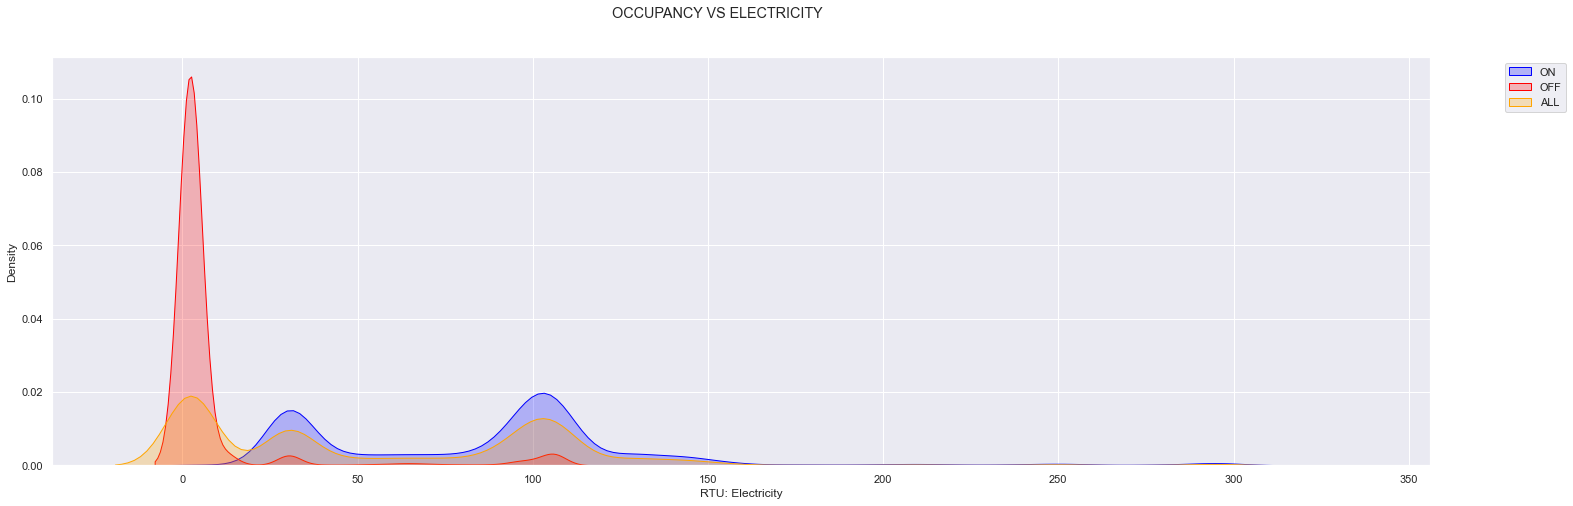

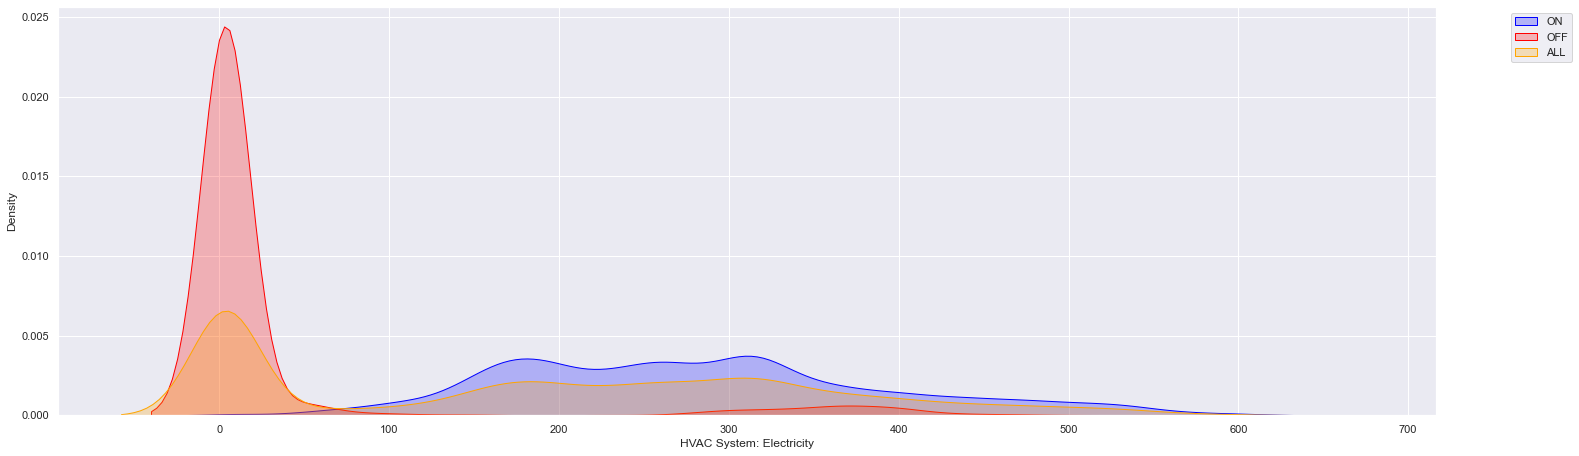

In [3]:

fig, ax = plt.subplots()


sns.kdeplot(df[df["Occupancy Mode Indicator"]==1]["RTU: Electricity"], shade=True, color="blue", label="ON", ax=ax)
sns.kdeplot(df[df["Occupancy Mode Indicator"]==0]["RTU: Electricity"], shade=True, color="RED", label="OFF", ax=ax)
sns.kdeplot(df['RTU: Electricity'],shade=True,color='orange',label='ALL')
ax.set_xlabel("RTU: Electricity")
ax.set_ylabel("Density")
ax.legend('ON','OFF')
fig.suptitle("OCCUPANCY VS ELECTRICITY")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


fig, ax = plt.subplots()

sns.kdeplot(df[df["Occupancy Mode Indicator"]==1]['HVAC System: Electricity'], shade=True, color="blue", label="ON", ax=ax)
sns.kdeplot(df[df["Occupancy Mode Indicator"]==0]['HVAC System: Electricity'], shade=True, color="RED", label="OFF", ax=ax)
sns.kdeplot(df['HVAC System: Electricity'],shade=True,color='orange',label='ALL')
ax.set_xlabel("RTU: Electricity")
ax.set_xlabel('HVAC System: Electricity')
ax.set_ylabel("Density")
ax.legend('ON','OFF')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


##### MANY DATES ARE MISSING OUT OF THE DATASET ENTIRELY

In [4]:
df=pd.read_csv('RTU.csv')
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df.index=df['Timestamp']

### DAILY AND HOURLY VARIATIONS

In [5]:
## THE HOURLY ANALYSIS IS QUITE ACCURATE
## THE DAILY ANALYSIS IS NOT VERY RELIABLE SINCE ONLY A FEW DATES ARE INCLUDED IN THE DATASET
## AS A RESULT OF WHICH THE SUBSEQUENT FORCAST WOULD NOT BE VERY ACCCURATE

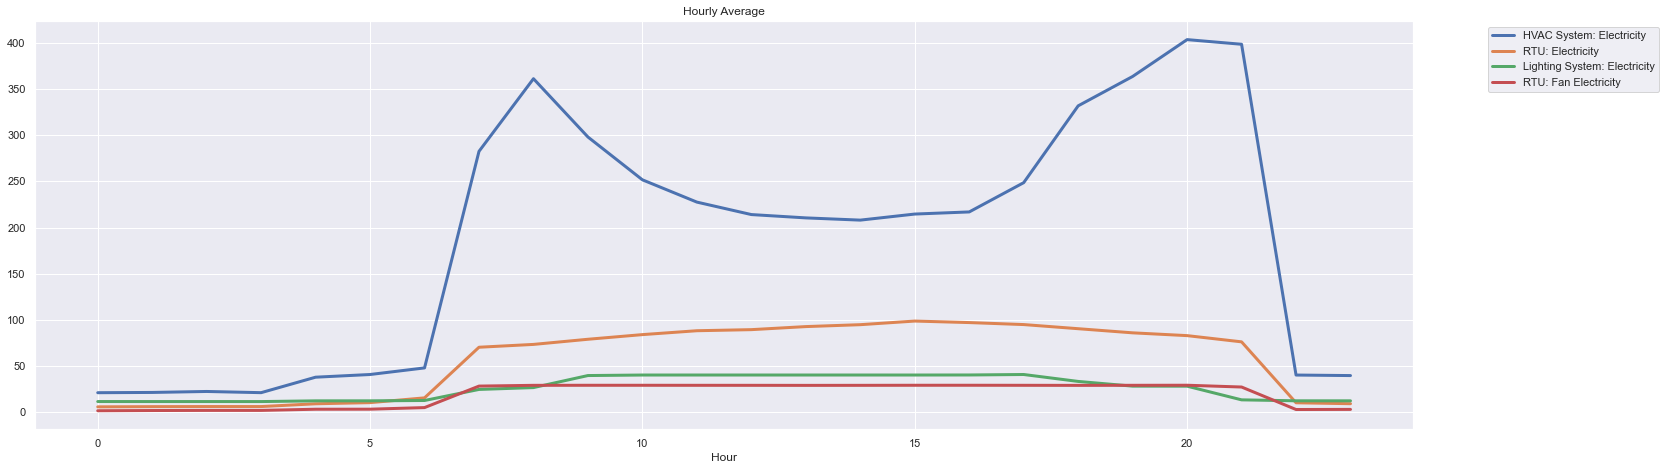

In [6]:
hour_df=df.groupby(df.index.hour).mean()[['HVAC System: Electricity','RTU: Electricity','Lighting System: Electricity','RTU: Fan Electricity ']]
hour_df.plot(linewidth=3)
plt.title('Hourly Average')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Hour')
plt.show()

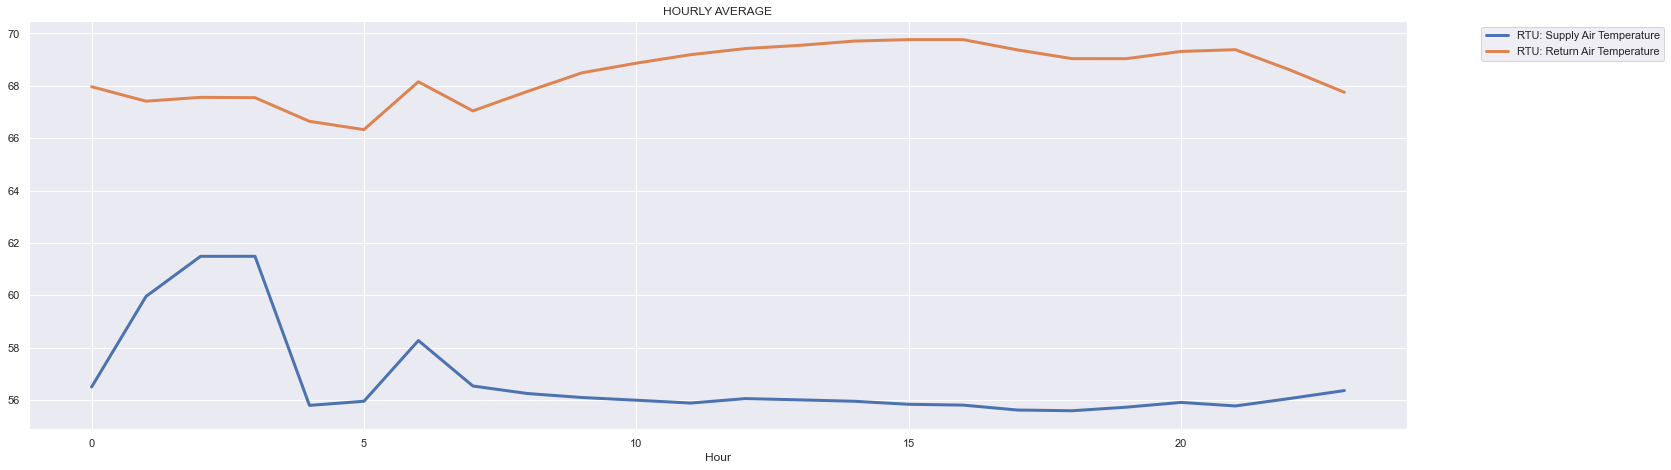

In [7]:
df_by_hour=df.groupby(df.index.hour).mean()
df_by_hour[['RTU: Supply Air Temperature','RTU: Return Air Temperature']].plot(linewidth=3)
plt.xlabel('Hour')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('HOURLY AVERAGE')
plt.xlabel('Hour')
plt.show()

#### TERMINAL ROOM TEMPERATURES 

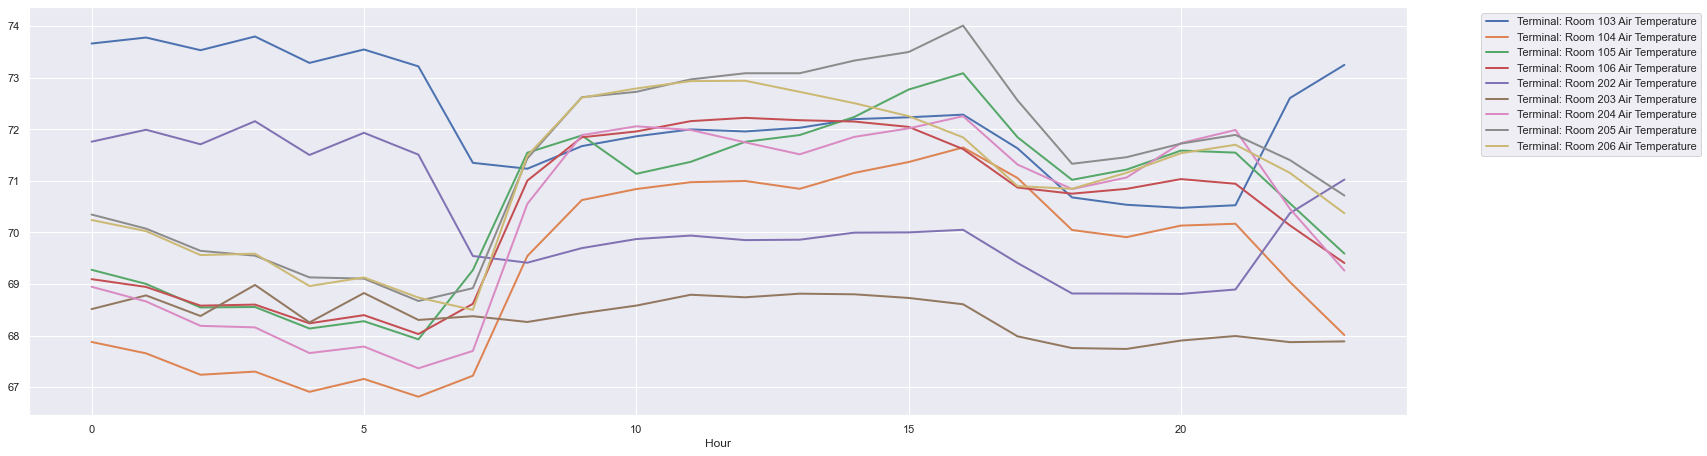

In [8]:
df_by_hour=df.groupby(df.index.hour).mean()
df_by_hour[['Terminal: Room 103 Air Temperature',
       'Terminal: Room 104 Air Temperature',
       'Terminal: Room 105 Air Temperature',
       'Terminal: Room 106 Air Temperature',
       'Terminal: Room 202 Air Temperature',
       'Terminal: Room 203 Air Temperature',
       'Terminal: Room 204 Air Temperature',
       'Terminal: Room 205 Air Temperature',
       'Terminal: Room 206 Air Temperature']].plot(linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Hour')
##plt.tight_layout()
plt.show()

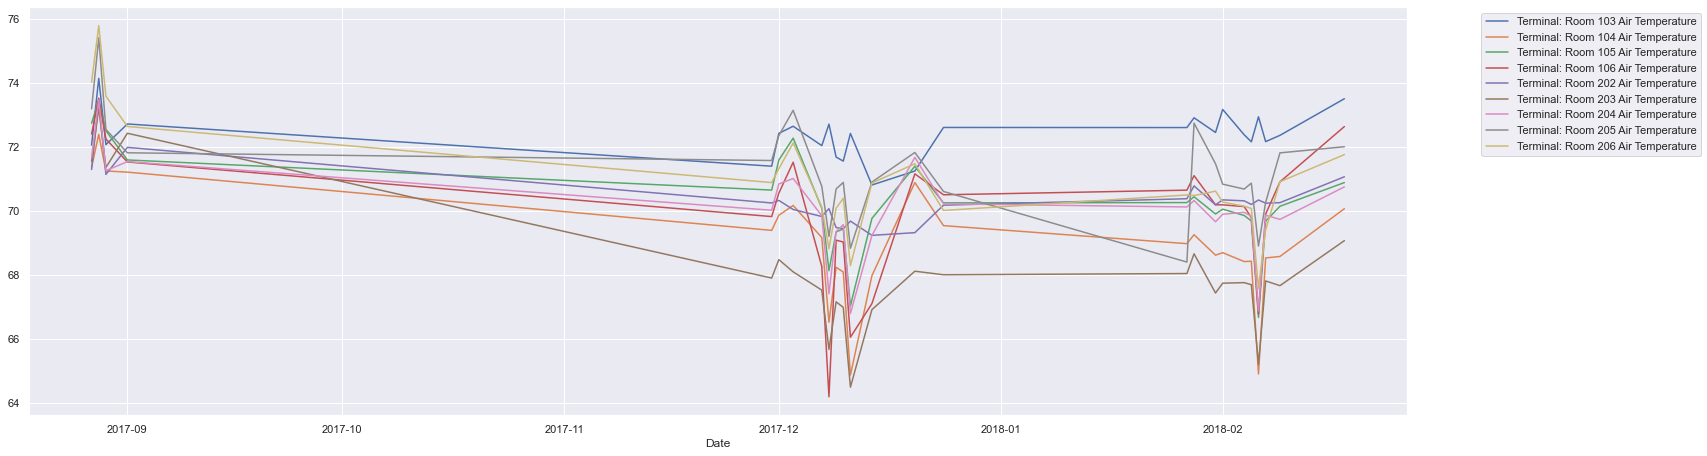

In [9]:
date_df=df.groupby(df.index.date).mean()
date_df[['Terminal: Room 103 Air Temperature',
       'Terminal: Room 104 Air Temperature',
       'Terminal: Room 105 Air Temperature',
       'Terminal: Room 106 Air Temperature',
       'Terminal: Room 202 Air Temperature',
       'Terminal: Room 203 Air Temperature',
       'Terminal: Room 204 Air Temperature',
       'Terminal: Room 205 Air Temperature',
       'Terminal: Room 206 Air Temperature']].plot.line()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Date')
##plt.tight_layout()
plt.show()

### TERMINAL ROOM HUMIDITIY

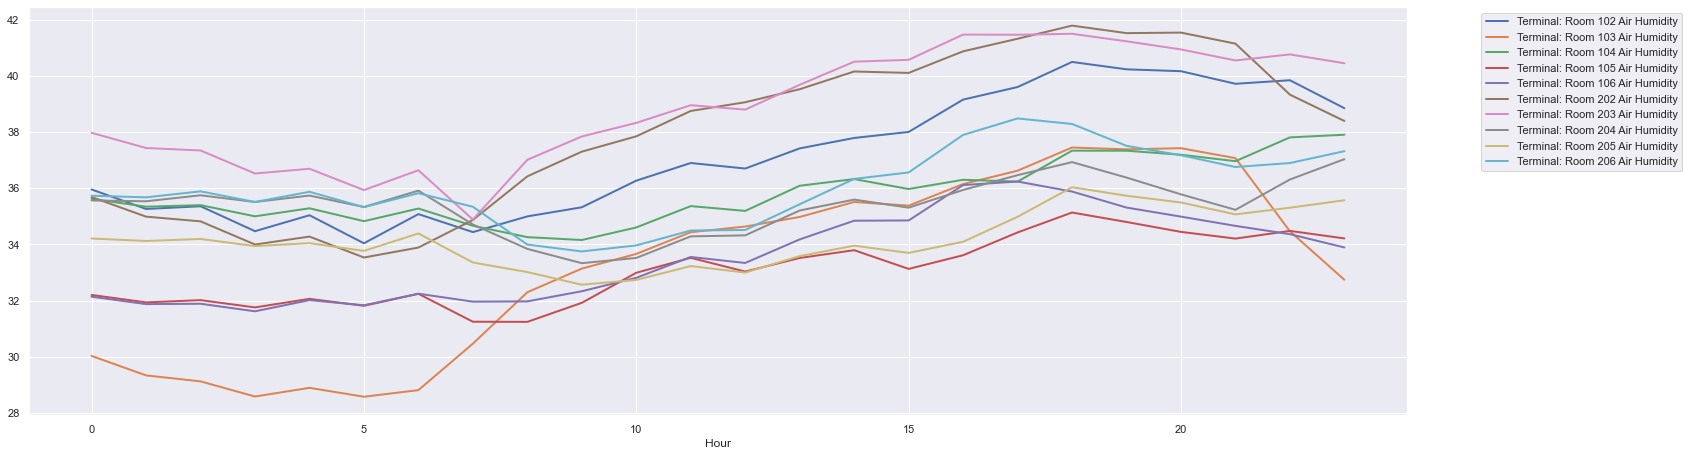

In [10]:
df_by_hour[['Terminal: Room 102 Air Humidity', 'Terminal: Room 103 Air Humidity',
       'Terminal: Room 104 Air Humidity', 'Terminal: Room 105 Air Humidity',
       'Terminal: Room 106 Air Humidity', 'Terminal: Room 202 Air Humidity',
       'Terminal: Room 203 Air Humidity', 'Terminal: Room 204 Air Humidity',
       'Terminal: Room 205 Air Humidity', 'Terminal: Room 206 Air Humidity',]].plot(linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Hour')
##plt.tight_layout()
plt.show()

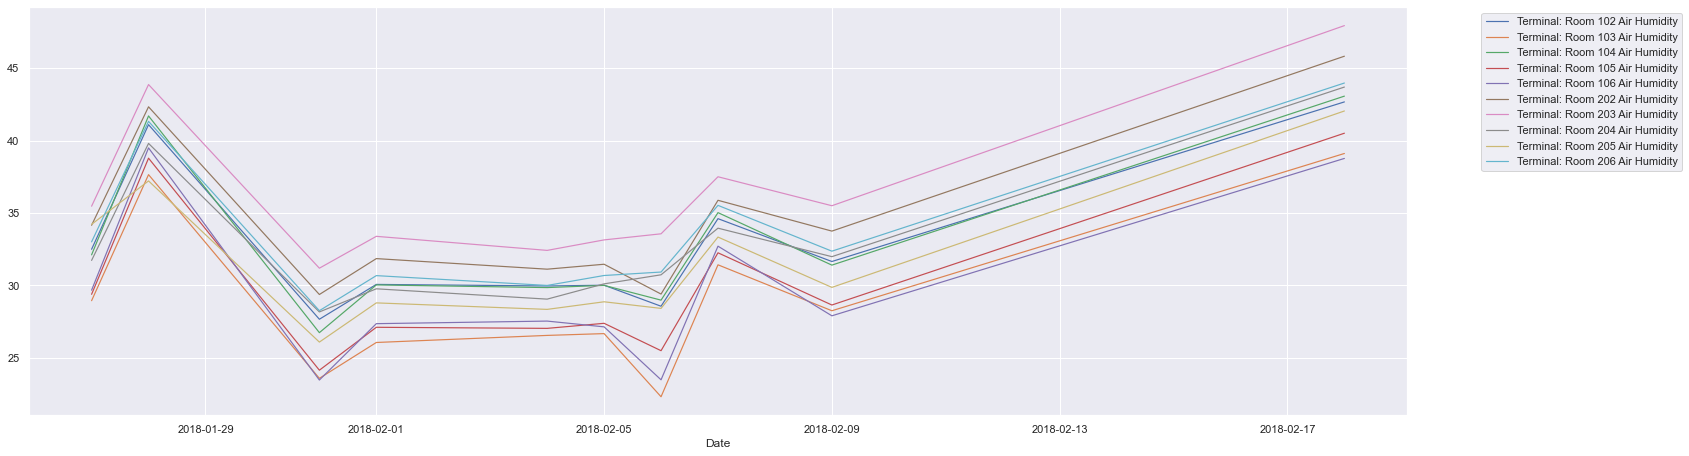

In [11]:
date_df[['Terminal: Room 102 Air Humidity', 'Terminal: Room 103 Air Humidity',
       'Terminal: Room 104 Air Humidity', 'Terminal: Room 105 Air Humidity',
       'Terminal: Room 106 Air Humidity', 'Terminal: Room 202 Air Humidity',
       'Terminal: Room 203 Air Humidity', 'Terminal: Room 204 Air Humidity',
       'Terminal: Room 205 Air Humidity', 'Terminal: Room 206 Air Humidity',]][pd.to_datetime('2018-01-27').date():].plot(linewidth=1.2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Date')
##plt.title('Daily Average Humidity in Terminal Rooms',loc='center')
##plt.tight_layout()
plt.show()

### FORCASTING RTU: Electricity

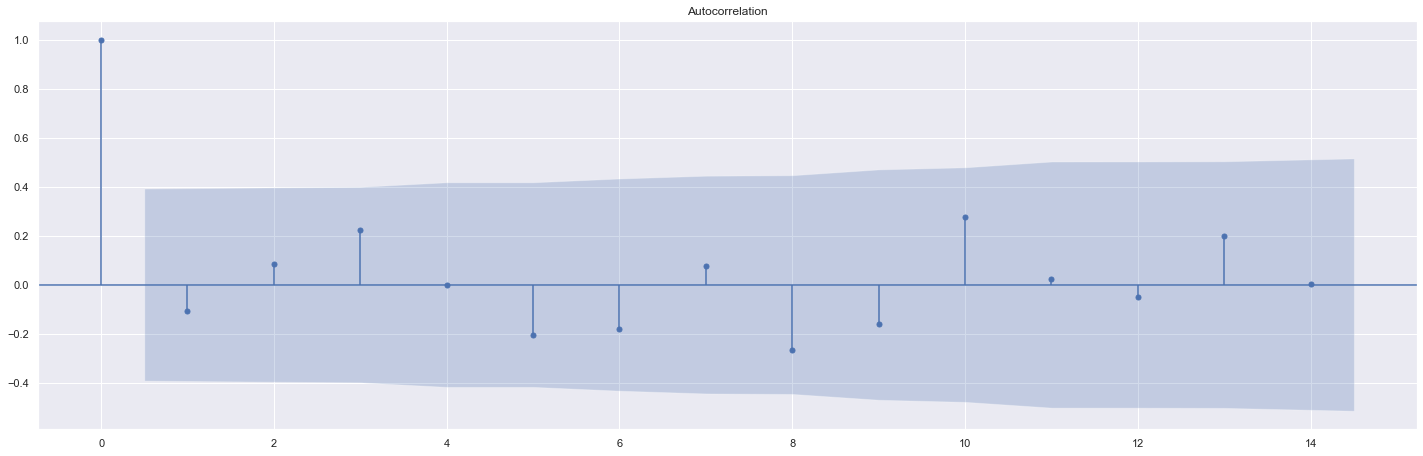

In [12]:
sns.set(rc={'figure.figsize':(22,7)})
plt.show()
plot_acf(date_df['RTU: Electricity'])
plt.show()

#### ARIMA MODEL FIT

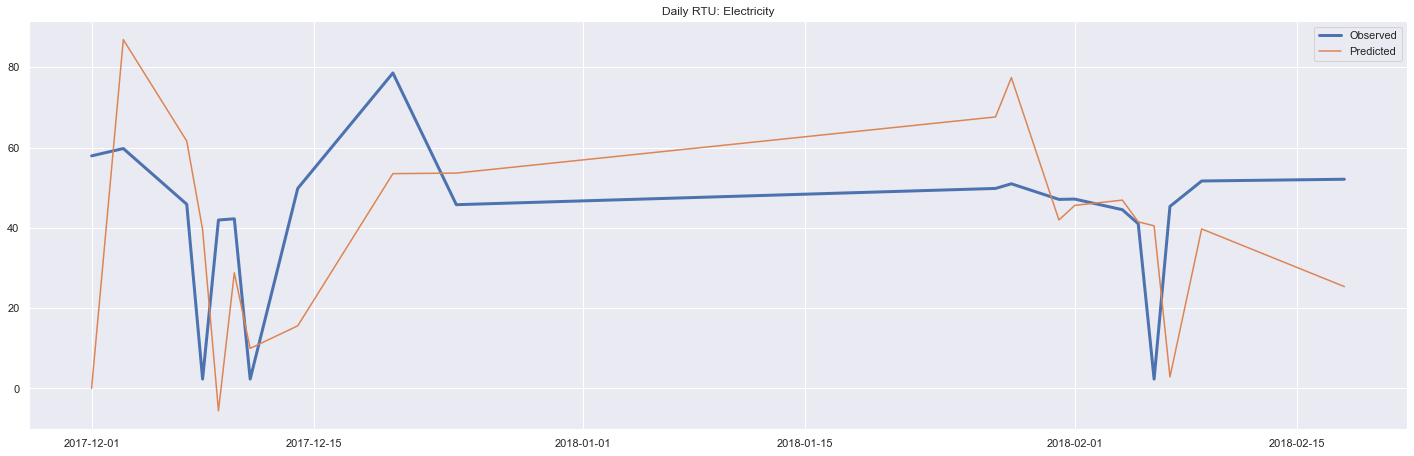

In [13]:
ts_model=ARIMA(date_df['RTU: Electricity'][pd.to_datetime('2017-12-1'):],order=(5,2,0))
ts_preds=ts_model.fit().predict()
#forecast = ts_model.fit().forecast(steps=7)
date_df['RTU: Electricity'][pd.to_datetime('2017-12-1'):].plot(linewidth=3)
plt.plot(ts_preds)
#plt.plot(forecast,color='red')
plt.title('Daily RTU: Electricity')
plt.legend(['Observed','Predicted'])
plt.show()

#### FORECAST FOR 7 DAYS

In [14]:
forecast = ts_model.fit().forecast(steps=7)
forecast

20     67.155426
21     78.382220
22     82.482635
23     94.374483
24    105.343813
25    112.026407
26    122.063278
Name: predicted_mean, dtype: float64

### MODELLING HVAC: System Electricity

In [15]:
### DROPPING THE FEATURES WITH MOST NAN VALUES

In [16]:
df=df.drop([ 'RTU: Circuit 1 Discharge Temperature',
       'RTU: Circuit 1 Condenser Outlet Temperature',
       'RTU: Circuit 1 Suction Temperature',
       'RTU: Circuit 2 Discharge Temperature',
       'RTU: Circuit 2 Condenser Outlet Temperature',
       'RTU: Circuit 2 Suction Temperature',
       'RTU: Circuit 1 Discharge Pressure',
       'RTU: Circuit 1 Condenser Outlet Pressure',
       'RTU: Circuit 1 Suction Pressure', 'RTU: Circuit 2 Discharge Pressure',
       'RTU: Circuit 2 Condenser Outlet Pressure',],axis=1)

df=df.drop(['VAV Box: Room 102 Air Temperature',
       'VAV Box: Room 103 Air Temperature',
       'VAV Box: Room 104 Air Temperature',
       'VAV Box: Room 105 Air Temperature',
       'VAV Box: Room 106 Air Temperature',
       'VAV Box: Room 202 Air Temperature',
       'VAV Box: Room 203 Air Temperature',
       'VAV Box: Room 204 Air Temperature',
       'VAV Box: Room 205 Air Temperature',
       'VAV Box: Room 206 Air Temperature',],axis=1)

In [17]:
def low_corr_features(df,target_variable,corr_val):
    import numpy as np
    features=df.columns
    corr_df=df.corr()
    return_list=[]
    corr_with_target=np.array(corr_df[target_variable])
    for i in range(0,len(corr_with_target)):
        if np.absolute(corr_with_target[i])<corr_val :
            return_list.append(features[i])

    return return_list
## above function identifies the low correlation features
def err_score(a,b):
    if(len(a)!=len(b)):
        return NULL
    err=[]
    sum=0
    for i in range (0,len(a)):
        err.append(np.absolute((a[i]-b[i])/a[i]))
    std=np.std(err)
    mean=np.mean(err)
    print("average error: ",mean)
    print("std_error: ",std)
## above function calculates the average relative error in the predictions and the validation set

In [18]:
low_corr_features(df,'HVAC System: Electricity',0.05)

['RTU: Circuit 2 Suction Pressure',
 'RTU: Electricity',
 'Terminal: Room 104 Air Humidity',
 'Terminal: Room 105 Air Humidity',
 'Terminal: Room 202 Air Humidity']

In [19]:
new_df=df.resample('5min').mean()
new_df=new_df.dropna()
new_df

,RTU: Supply Air Temperature,RTU: Return Air Temperature,RTU: Supply Air Fan Status,RTU: Circuit 2 Suction Pressure,RTU: Supply Air Volumetric Flow Rate,RTU: Electricity,RTU: Natural Gas,Occupancy Mode Indicator,Terminal: Room 102 Air Humidity,Terminal: Room 103 Air Humidity,...,VAV Box: Room 103 Reheat Status,VAV Box: Room 104 Reheat Status,VAV Box: Room 105 Reheat Status,VAV Box: Room 106 Reheat Status,VAV Box: Room 202 Reheat Status,VAV Box: Room 203 Reheat Status,VAV Box: Room 204 Reheat Status,VAV Box: Room 205 Reheat Status,VAV Box: Room 206 Reheat Status,Fault Detection Ground Truth
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-27 06:40:00,66.308,74.446,1.0,206.800000,3646.0,62.139434,0.0,1.0,49.078,46.340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-08-27 06:45:00,58.618,74.418,1.0,177.140000,4395.2,232.030340,0.0,1.0,50.578,47.918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-08-27 06:50:00,62.726,73.794,1.0,210.700000,4353.8,76.358562,0.0,1.0,53.820,50.342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-08-27 06:55:00,60.020,73.510,1.0,181.260000,4380.4,151.839960,0.0,1.0,54.262,51.512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-08-27 07:00:00,54.656,72.922,1.0,169.900000,4407.0,159.180360,0.0,1.0,51.768,48.692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-18 21:35:00,57.108,69.074,1.0,183.966667,3192.6,52.167570,0.0,1.0,46.730,45.332,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-02-18 21:40:00,54.776,69.184,1.0,171.920000,3190.2,107.058940,0.0,1.0,46.558,46.228,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2018-02-18 21:45:00,56.712,69.106,1.0,168.600000,3197.4,53.367904,0.0,1.0,43.906,44.494,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [21]:
X=new_df[['RTU: Supply Air Temperature', 'RTU: Return Air Temperature',
       'RTU: Supply Air Fan Status', 'RTU: Circuit 2 Suction Pressure',
       'RTU: Supply Air Volumetric Flow Rate',
       'RTU: Natural Gas', 'Occupancy Mode Indicator',
       'Terminal: Room 102 Air Humidity', 'Terminal: Room 103 Air Humidity',
       'Terminal: Room 104 Air Humidity', 'Terminal: Room 105 Air Humidity',
       'Terminal: Room 106 Air Humidity', 'Terminal: Room 202 Air Humidity',
       'Terminal: Room 203 Air Humidity', 'Terminal: Room 204 Air Humidity',
       'Terminal: Room 205 Air Humidity', 'Terminal: Room 206 Air Humidity',
       'Terminal: Room 102 Air Temperature',
       'Terminal: Room 103 Air Temperature',
       'Terminal: Room 104 Air Temperature',
       'Terminal: Room 105 Air Temperature',
       'Terminal: Room 106 Air Temperature',
       'Terminal: Room 202 Air Temperature',
       'Terminal: Room 203 Air Temperature',
       'Terminal: Room 204 Air Temperature',
       'Terminal: Room 205 Air Temperature',
       'Terminal: Room 206 Air Temperature',
       'Terminal: Room Air Temperature Heating Setpoint',
       'Terminal: Room Air Temperature Cooling Setpoint','RTU: Electricity',
        'Lighting System: Electricity',
       'Lighting System: Control Command', 'RTU: Compressor 1 On/Off Status',
       'RTU: Compressor 2 On/Off Status', 'RTU: Fan Electricity ',
       'VAV Box: Room 102 Reheat Status', 'VAV Box: Room 103 Reheat Status',
       'VAV Box: Room 104 Reheat Status', 'VAV Box: Room 105 Reheat Status',
       'VAV Box: Room 106 Reheat Status', 'VAV Box: Room 202 Reheat Status',
       'VAV Box: Room 203 Reheat Status', 'VAV Box: Room 204 Reheat Status',
       'VAV Box: Room 205 Reheat Status', 'VAV Box: Room 206 Reheat Status',
       'Fault Detection Ground Truth']]
y=new_df['HVAC System: Electricity']

scaler1=StandardScaler()
features=X.columns
for i in features:
       X[i]=scaler1.fit_transform(np.array(new_df[i]).reshape(-1,1))

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4=SVR(kernel='linear')
model5=MLPRegressor([256,512,128],activation='relu',solver='adam')

In [22]:
errors=[]
model1.fit(X_train,y_train)
model1_y_preds=model1.predict(X_test)
errors.append(mean_absolute_error(y_true=y_test,y_pred=model1_y_preds))
model2.fit(X_train,y_train)
model2_y_preds=model2.predict(X_test)
errors.append(mean_absolute_error(y_true=y_test,y_pred=model2_y_preds))
model3.fit(X_train,y_train)
model3_y_preds=model3.predict(X_test)
errors.append(mean_absolute_error(y_true=y_test,y_pred=model3_y_preds))
model4.fit(X_train,y_train)
model4_y_preds=model4.predict(X_test)
errors.append(mean_absolute_error(y_true=y_test,y_pred=model4_y_preds))
model5.fit(X_train,y_train)
model5_y_preds=model5.predict(X_test)
errors.append(mean_absolute_error(y_true=y_test,y_pred=model5_y_preds))

LinearRegression()
average error:  0.10776934415021337
std_error:  0.11675847914254164
DecisionTreeRegressor()
average error:  0.0756123547336334
std_error:  0.09145597821867368
RandomForestRegressor()
average error:  0.0514961862838308
std_error:  0.06990060163846536
SVR(kernel='linear')
average error:  0.11085892882589388
std_error:  0.12277193843683781
MLPRegressor(hidden_layer_sizes=[256, 512, 128])
average error:  0.03263503999623201
std_error:  0.03673266754990594


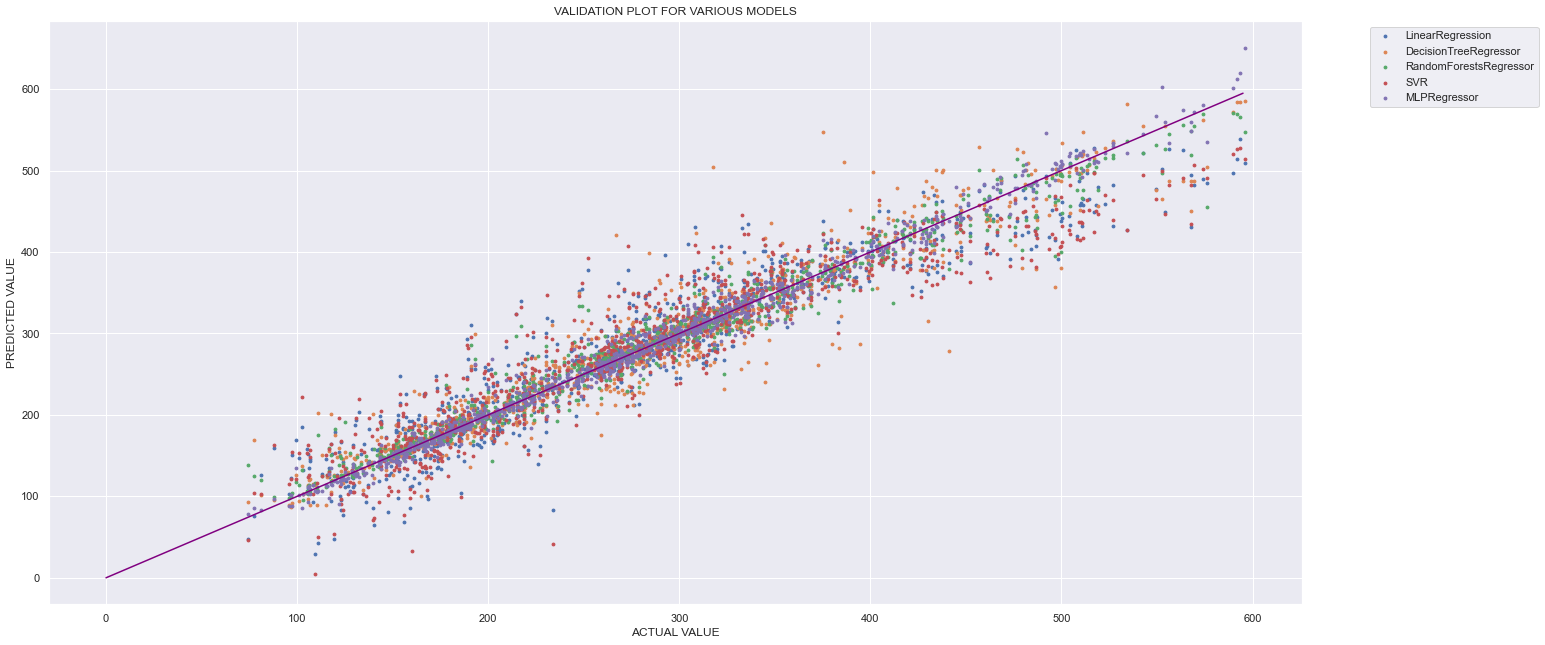

In [23]:
sns.set(rc={'figure.figsize':(20,10)})
print(model1)
err_score(y_test,model1_y_preds)
plt.scatter(y_test,model1_y_preds,s=8)
print(model2)
err_score(y_test,model2_y_preds)
plt.scatter(y_test,model2_y_preds,s=8)
print(model3)
err_score(y_test,model3_y_preds)
plt.scatter(y_test,model3_y_preds,s=8)
print(model4)
err_score(y_test,model4_y_preds)
plt.scatter(y_test,model4_y_preds,s=8)
print(model5)
err_score(y_test,model5_y_preds)
plt.scatter(y_test,model5_y_preds,s=8)
plt.xlabel('ACTUAL VALUE')
plt.ylabel('PREDICTED VALUE')
plt.legend(['LinearRegression','DecisionTreeRegressor','RandomForestsRegressor','SVR','MLPRegressor'],bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.plot(range(0,int(np.max(y_test))),color='purple',label='Ideal Line')
plt.title('VALIDATION PLOT FOR VARIOUS MODELS')
plt.show()

In [24]:
pd.DataFrame({'Model':['LinearRegression','DecisionTreeRegressor','RandomForestsRegressor','SVR','MLPRegressor'],'mean_absolute_error':errors})

,Model,mean_absolute_error
0,LinearRegression,26.284596
1,DecisionTreeRegressor,20.285880
2,RandomForestsRegressor,13.485382
3,SVR,27.696492
4,MLPRegressor,8.701640


Text(0.5, 1.0, 'Correlation with HVAC: System Electricity')

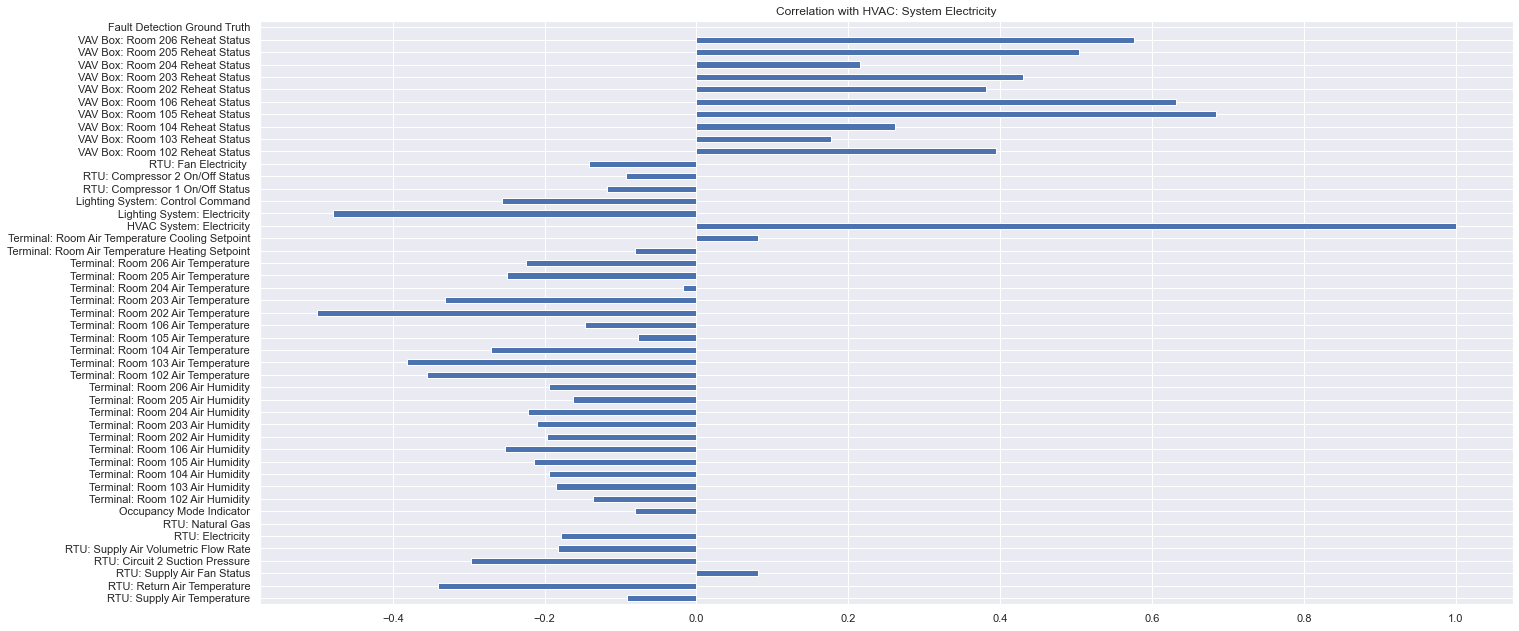

In [25]:
new_df.corr()['HVAC System: Electricity'].plot.barh()
plt.title('Correlation with HVAC: System Electricity')

Text(0.5, 1.0, 'Feature Importances')

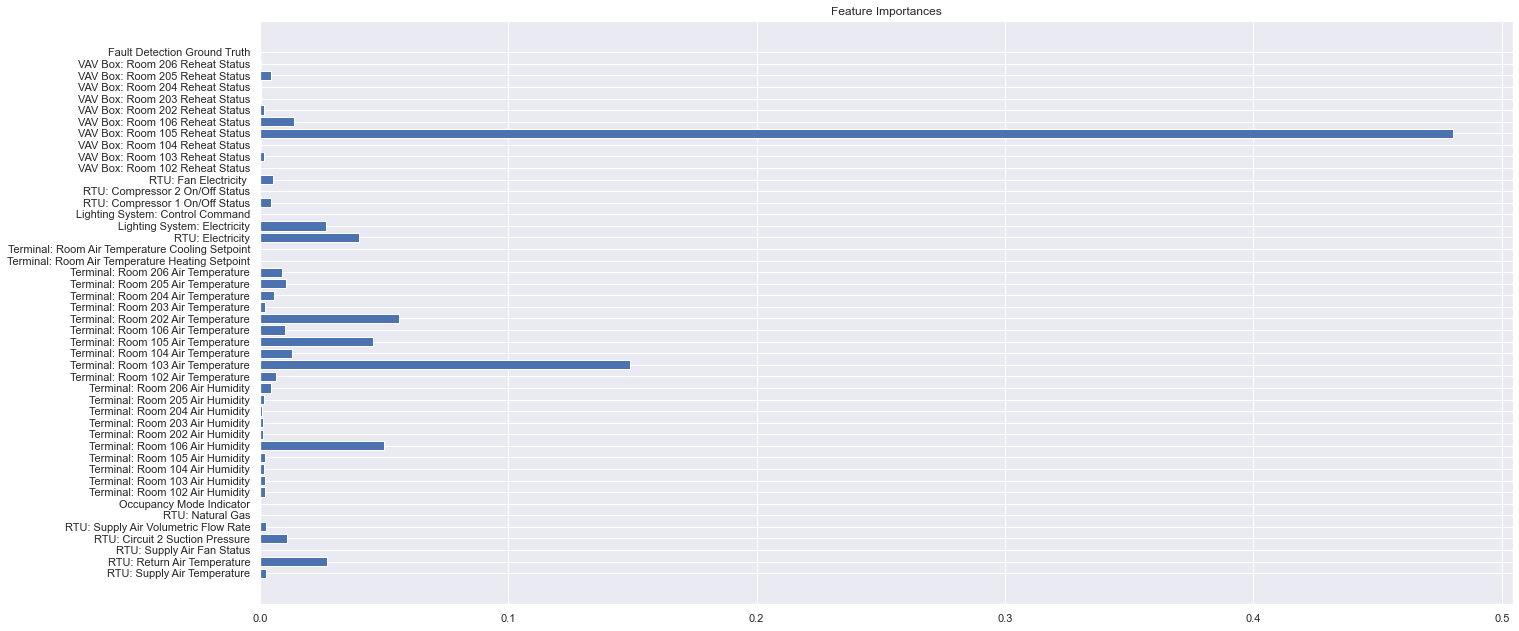

In [26]:
plt.barh(X.columns,model3.feature_importances_)
plt.title('Feature Importances')
## this is sepcifically for random forests model, but is roughly accurate in general

### STATISTICAL ANALYSIS OF THE BEST MODEL(MLP)

##### CONFIDENCE INTERVAL ANALYSIS

In [27]:
def err_confidence_interval(actual_val,pred_val,alpha):
    import scipy.stats as stats
    import seaborn as sns
    import numpy as np
    if(len(actual_val)!=len(pred_val)):
        return NULL
    err=[]
    rel_err=[]
    for i in range (0,len(actual_val)):
        err.append((actual_val[i]-pred_val[i])/actual_val[i])
        rel_err.append(np.absolute((actual_val[i]-pred_val[i])/actual_val[i]))
    std=np.std(err)
    mean=np.mean(err)
    z_value=stats.norm.ppf(1-alpha)
    sns.distplot(err,axlabel='error', hist=False);
    plt.title('RELATIVE ERROR DENSITY')
    print("average error: ")
    print(100*(np.mean(rel_err)),"%")
    print(100*(1-alpha)," % predicted values lie within the error margin:")
    print("(",100*(mean-z_value*(std)) ,"%", ",",100*(mean+z_value*(std)),"%",")")
    print("ERROR DENSITY")

average error: 
3.263503999623201 %
95.0  % predicted values lie within the error margin:
( -8.198441284748542 % , 7.961110235185154 % )
ERROR DENSITY


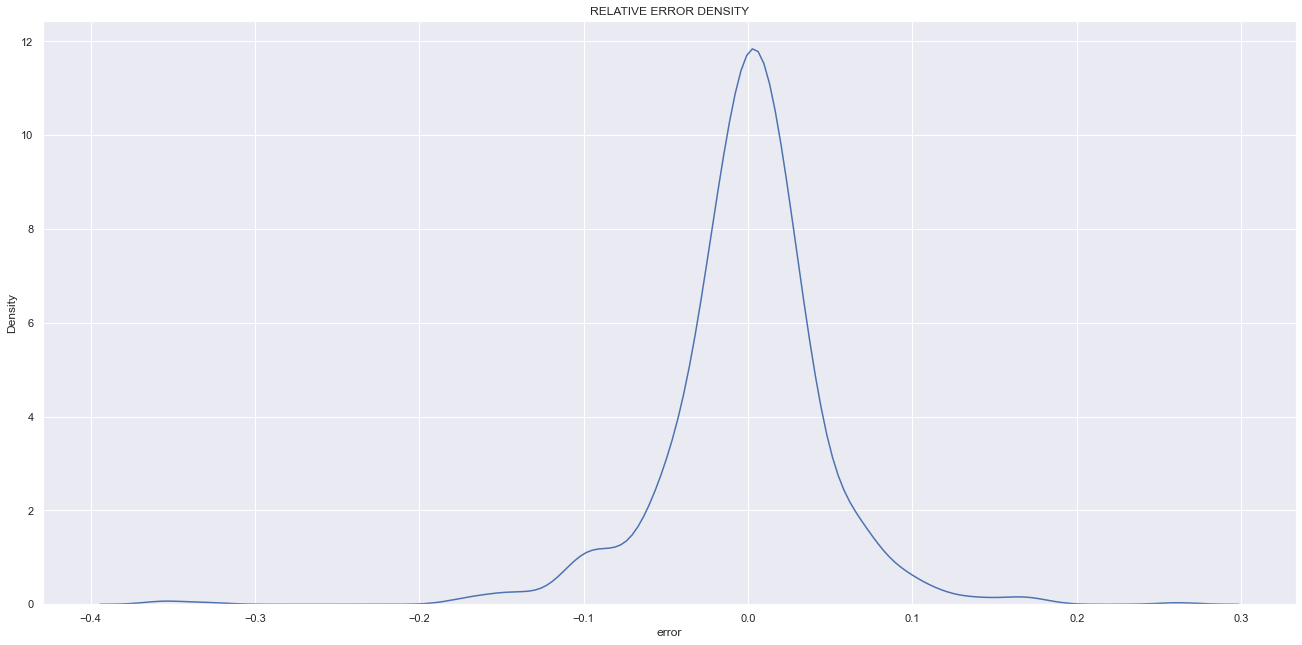

In [28]:
err_confidence_interval(actual_val=y_test,pred_val=model5_y_preds,alpha=0.05)

#### MOST OF THE PREDICTED VALUES IN VALIDATION SET LIE WITHIN 10% OF THE ACTUAL VALUES

###### FEEL FREE TO PROVIDE ME WITH ANY SUGGESTIONS
###### SIGNING OFF
###### VED UMRAJKAR
###### EMAIL: vedumrajkar@gmail.com